In [64]:
%load_ext autoreload
%autoreload 2
#See bmes.ahmet/README.TXT for setting up BMESAHMETDIR environment variable.
import sys,os; sys.path.append(os.environ['BMESAHMETDIR']); import bmes

import sklearn
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# Get iris data from sklearn
from sklearn.datasets import load_iris
iris = load_iris()

# Keep only versicolor and virginica
X = iris['data'][iris['target'] > 0, :2]
T = iris['target'][iris['target'] > 0]
groups = ['versicolor', 'virginica']

In [32]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X, T)

# Coefficients
A = lda.coef_[0]
B = lda.intercept_

In [109]:
import seaborn as sns

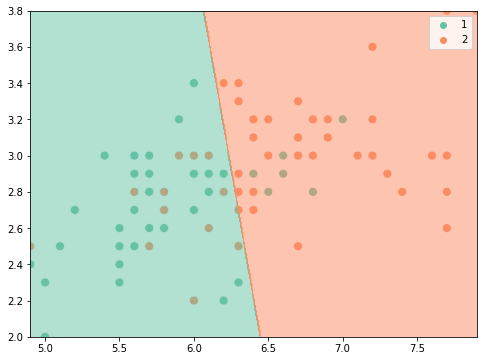

In [124]:
# Create meshgrid
nx, ny = 500, 500
X_min, X_max = X[:, 0].min(), X[:, 0].max()
Y_min, Y_max = X[:, 1].min(), X[:, 1].max()

# Create meshgrid
xx, yy = np.meshgrid(
    np.linspace(X_min, X_max, nx),
    np.linspace(Y_min, Y_max, ny)
)

# Flatten meshgrid to array
# Xmesh = np.column_stack((xx.flatten(), yy.flatten()))
Xmesh = np.c_[xx.ravel(), yy.ravel()]

# Get prediction probabilities
# Z = lda.predict_proba(Xmesh)
Z = lda.predict(Xmesh)

# Reshape the prediction probabilities to meshgrid shape
Z = Z.reshape(xx.shape)

# Plot data
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=T, s=80, alpha=1, legend='full',
    palette=sns.color_palette('Set2', 2), ax=ax
)

cmap = colors.ListedColormap(sns.color_palette('Set2', 2).as_hex())
# # Plot filled contour with appropriate labels (and colors)
ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
# ax.set_xlabel('Sepal length')
# ax.set_ylabel('Sepal width')

In [ ]:
# Create meshgrid
nx, ny = 500, 500
X_min, X_max = X[:, 0].min(), X[:, 0].max()
Y_min, Y_max = X[:, 1].min(), X[:, 1].max()

# Create meshgrid
xx, yy = np.meshgrid(
    np.linspace(X_min, X_max, nx),
    np.linspace(Y_min, Y_max, ny)
)

# Flatten meshgrid to array
# Xmesh = np.column_stack((xx.flatten(), yy.flatten()))
Xmesh = np.c_[xx.ravel(), yy.ravel()]

# Get predictions
Z = lda.predict(Xmesh)
# Decode predictions
# Z = np.where(Z == 1, 'versicolor', 'virginica')
# Reshape predictions to meshgrid
Z = Z.reshape(xx.shape)

# Scatterpolot
fig, ax = plt.subplots(figsize=(8, 6))
g = sns.scatterplot(
    x=X[:,0], y=X[:,1], hue=T, edgecolor='black', linewidth=1
)

# extract the colormap, so the regions can be colored in the same colors as the scatterplot
colormap = colors.ListedColormap(sns.color_palette().as_hex()[:2])
ax.contourf(xx, yy, Z, alpha=0.5, cmap=colormap);

In [60]:
T

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

(500, 500)

In [48]:
lda.predict_proba(Xmesh)

array([[0.94508016, 0.05491984],
       [0.94450304, 0.05549696],
       [0.94392022, 0.05607978],
       ...,
       [0.0337982 , 0.9662018 ],
       [0.03343875, 0.96656125],
       [0.03308298, 0.96691702]])

In [49]:
lda.predict(Xmesh).shape

(250000,)

In [39]:
np.column_stack((xx.flatten(), yy.flatten())).shape

(250000, 2)

In [43]:
np.c_[xx.ravel(), yy.ravel()].shape

(250000, 2)